# Predicting Medical Expenses for Insurance and Analyzing Factors

Author: Isabella Robles

Course Project, UC Irvine, Math 10, S24

Yes, I would like to post my notebook on the course's website

# Introduction

Within this dataset I will be looking at medical insurance charges and the the relationship it shares with personal attributes such as gender, body mass index(BMI), region they live in, whether they smoke or not, and the amount of children they have. Medical charges are an important cost in people's lives, which incur through hospitals visits, doctor's appointments and check-ups, medications, surgeries, etc. Through this analysis, I'm hoping to uncover significant models, data, and values that can help explain the variability in medical insurance charges. Also, I hope it will help me have a better understanding of how these components factor in medical costs.

Furthermore, it can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

# Section 1: Overview of the dataset & cleaning it up

Before I start my analysis and deep dive of the dataset, I need to import all my necessary packages, so my code works smoothly

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from itertools import combinations
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.inspection import DecisionBoundaryDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

Reference: This dataset contains 7 columns including: age, sex, bmi, the number of children, if they are a smoker, region and medical charge. It is a dataset from Kaggle, here is the link: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

In [2]:
import pandas as pd
df = pd.read_csv('insurance.csv')
# This is an example of entries 0-10
df.head(11)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Cleaning

In [3]:
#locating to see if there is any missing data, and there isn't! So, we do need to clean up the data
df_missing = df[df.isna().any(axis=1)]
df_missing

,age,sex,bmi,children,smoker,region,charges


## Visualization with Seaborn

This is a little overview of the data that provides some basic statistics like the mean, standard deviation, minimum and maximum values, the quartiles, and the count. 

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Histograms

Here, I use seaborn to create a a chart with a distribution of the charges. It takes the amount of charges and does a count on them, by creating a histogram.

/Users/wiqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Charges')

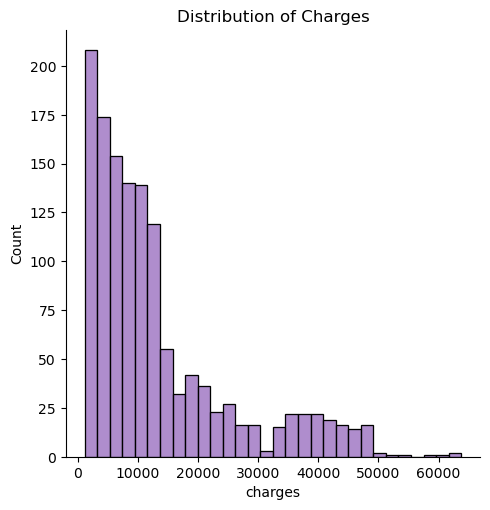

In [5]:
sns.displot(df, x="charges", color='tab:purple')
plt.title("Distribution of Charges")

Similarly, I create another histogram with the distribution of charges, however I include the regions and the amount of times those specific regions have those charges

/Users/wiqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


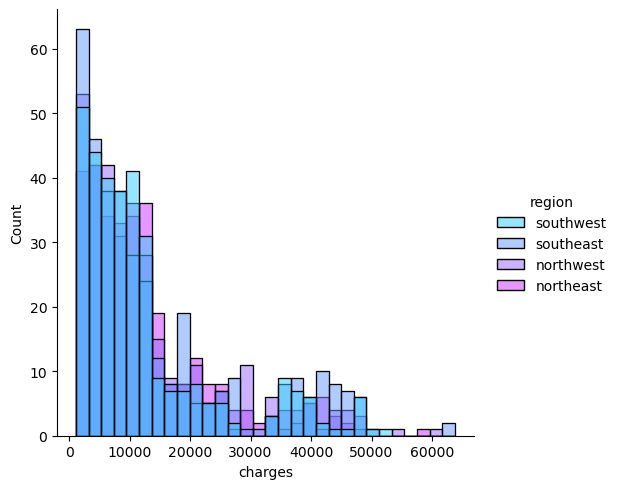

In [6]:
sns.displot(df, x='charges', hue='region', palette='cool')

### Bar Plots

The configurations of these bar plots were adapted from a Kaggle Data Analysis of this dataset by Marie. This is the link: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression

Now, I want to look at the average sum of charges within each region. The x-axis represents the average sum of charges, and the y-axis is the regions.

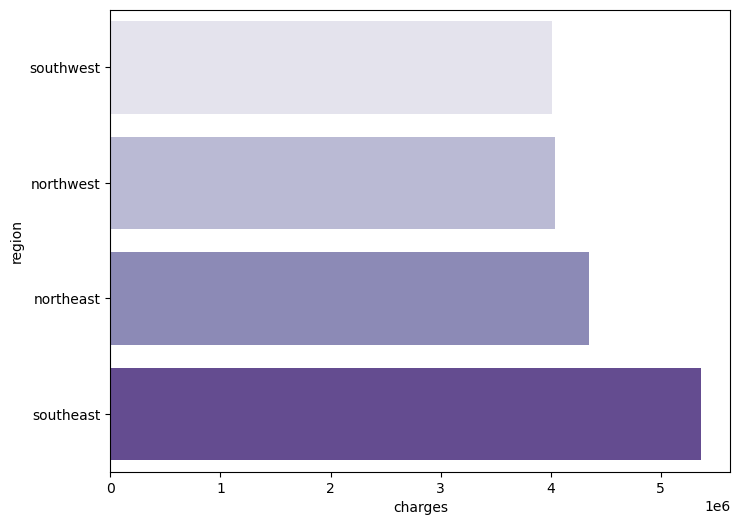

In [7]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Purples')

From the previous chart, we can tell that the southeast has the highest amount of medical charges, then the northeast, then the northwest, then the least amount of medical charges is the southwest. This leaves me with questions such as how is the insurance designed in these areas? Are these areas more developed, therefore more professional qualified workers? Does the southeast have more people living there? These are some external factors that one can think about when looking at the data.

Now, I've created a barplot using seaborn which analyzes the effects of the region that one lives in and their sex on the medical insurance charges

The x-axis is the region, the y-axis is the charges, and the legend is sex

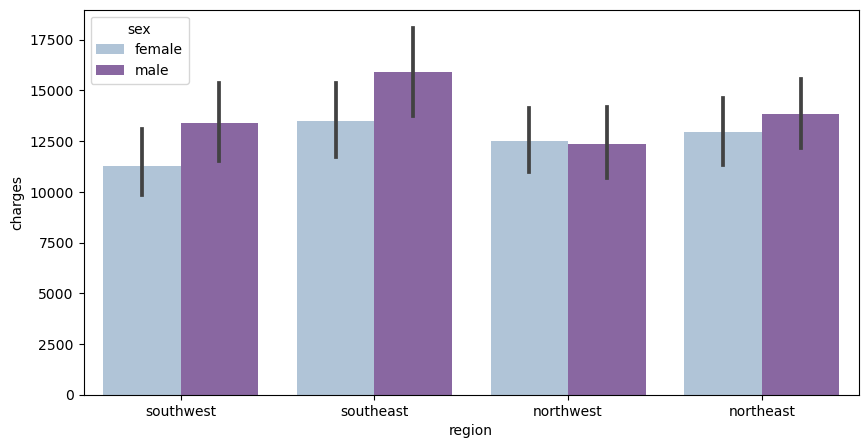

In [8]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
ax = sns.barplot(x='region', y= 'charges', hue='sex', data=df, palette='BuPu')

From this data, we can tell that men tend to have higher medical insurance charges than females do in most regions. The only exception is the northwest, which is pretty even in medical charges, yet males have slightly less medical charges than females.

I produce a similar barplot as the previous one except, instead of sex, I use the person's smoking habits. 

The x-axis is the region, the y-axis is the charges, and the legend is whether they are a smoker or not

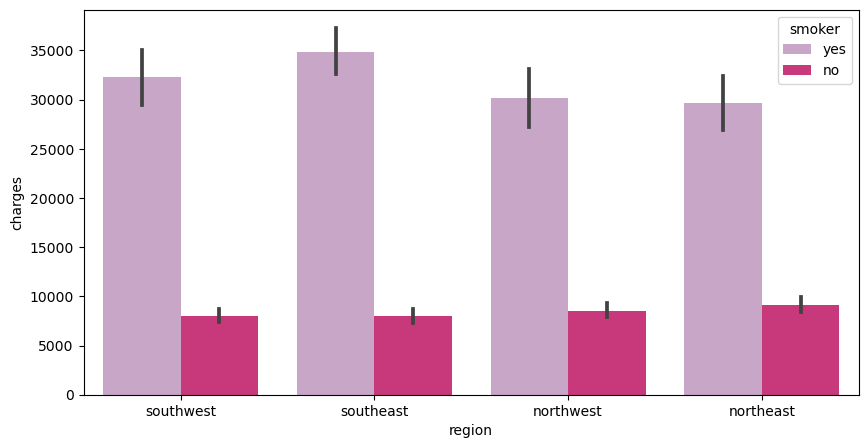

In [9]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
ax = sns.barplot(x='region', y= 'charges', hue='smoker', data=df, palette='PuRd')

From this chart, we can conclude that smokers in all regions have higher medical costs compared to non-smokers. This is expected because smokers are more perceptible to lung and heart issues. Hence, the higher medical charges.

Finally, I will be looking at a very similar chart, once again. However, instead of smoking habits, I use the amount of children they have. 

In [10]:
#When I was doing this I was getting an error so I forcefully have to conver the numpy.int64 into a string
df['children'] = df['children'].astype(str)

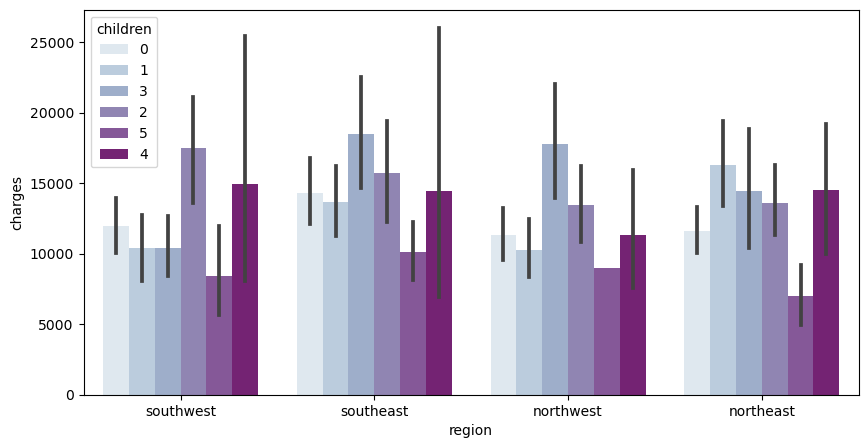

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='BuPu')

This chart holds a lot of varying data. In the southwest, people who have 2 children incur the highest amount of medical charges. In the southeast, people who have 3 children incur the highest amount of medical charges. Similarly, in the northwest, people who have 3 children incur the highest amount of medical charges. In the northeast, people who have 1 child incur the highest amount of medical charges

What I found interesting is that for every region, people who had 5 kids had the least amount of medical charges. Considering the amount of kids, you would expect it to be on the higher side. 

# Section 2: Data Analysis

## 2.1 Linear Regression & Multi-Linear Regression

### Single Variable Linear Regression

Quickly creating a fresh dataset to work with. I personally like making new ones so old data does not get complicated with the new one. I am also converting the smoking habit variable into a numerical one instead of a categorical one.

In [12]:
dfreg = df.copy()
dfreg['smoker']=dfreg['smoker'].replace({'yes': 1, 'no': 0})

In [13]:
# Splitting the testing and training data
df_train, df_test = train_test_split(dfreg, test_size=0.5, random_state=0, stratify=df['sex'])

Starting off with single variable linear regression, I am seeing how the the four features, age, bmi, amount of children, and smoking habits can affect the medical charges. 

In [14]:
features = ['age','bmi','children', 'smoker']

#find the best predictor of charges
from sklearn.linear_model import LinearRegression
for feature in features: 
    # Perform linear regression on each individual feature
    lreg = LinearRegression()
    lreg.fit(df_train[[feature]], df_train['charges'])
    
    # Calculating Training and testing scores
    score_train = lreg.score(df_train[[feature]], df_train['charges'])
    score_test = lreg.score(df_test[[feature]], df_test['charges'])
    
    # Printing the Training and Testing Scores to compare
    print(f'Feature: {feature}, Train R^2 Score: {score_train}, Test R^2 Score: {score_test}')

Feature: age, Train R^2 Score: 0.07107561005175234, Test R^2 Score: 0.10382549378652717
Feature: bmi, Train R^2 Score: 0.04348328676829405, Test R^2 Score: 0.03042333839488698
Feature: children, Train R^2 Score: 0.002596877727849556, Test R^2 Score: 0.0014353181766214584
Feature: smoker, Train R^2 Score: 0.6107554823806964, Test R^2 Score: 0.6272669198275533


We can see that the best feature of predicitng medical charges is whether or not the person is a smoker.

### Multi-Linear Regression & Single Linear Regression w/ 15 Models

Now, I am doing linear regression with 15 different models, which holds different combinations of the features, trying to determine which combination is the best in predicting the medical charges. 

In [15]:
# List to store the best subset
best_subset = []
best_score = 0

# For-loop that goes through each model
for L in range(1, len(features) + 1):
    for subset in combinations(features, L):
        
        # Perform Linear Regression 
        lreg = LinearRegression()
        lreg.fit(df_train[list(subset)], df_train['charges'])
        
        #Calculating testing and training scores
        test_score = lreg.score(df_test[list(subset)], df_test['charges'])
        train_score = lreg.score(df_train[list(subset)], df_train['charges'])
        
        print(f'{subset}: {train_score:.2f} {test_score:.2f}')
        
        # checking to see which test score is the best
        if test_score > best_score:
            best_score = test_score
            best_subset = subset
            
# Printing the best subset and it's score            
print(f'best subset: {best_subset} {best_score:.2f}')

('age',): 0.07 0.10
('bmi',): 0.04 0.03
('children',): 0.00 0.00
('smoker',): 0.61 0.63
('age', 'bmi'): 0.10 0.13
('age', 'children'): 0.07 0.11
('age', 'smoker'): 0.70 0.74
('bmi', 'children'): 0.05 0.04
('bmi', 'smoker'): 0.65 0.66
('children', 'smoker'): 0.61 0.63
('age', 'bmi', 'children'): 0.11 0.13
('age', 'bmi', 'smoker'): 0.73 0.76
('age', 'children', 'smoker'): 0.70 0.74
('bmi', 'children', 'smoker'): 0.66 0.66
('age', 'bmi', 'children', 'smoker'): 0.74 0.76
best subset: ('age', 'bmi', 'children', 'smoker') 0.76


We can conclude that the best combination of features is when it includes all four of the features, age, bmi, amount of children, and smoking habits. 

### Multi-Linear Regression with Categorical Data

Now, I am using multi-linear regression while using categorical data. This takes all of the the features, as well as the categorical data values to predict the medical insurance charges. This is a great tool because categorical variables play a key role in determining those costs, not just the numeric ones.

In [16]:
# Setting the features that I will be using and making the region into unique values
features = ['age','bmi','children', 'smoker']
region = dfreg['region'].unique()

total_rsm = 0
total_rsr = 0

for r in region:
    # Getting the testing and training values of the dataset using the region
    df_train_region = df_train[df_train['region'] == r]
    df_test_region = df_test[df_test['region'] == r]
    
    # Performing Linear Regression and fitting the model
    lreg3 = LinearRegression()
    lreg3.fit(df_train_region[features], df_train_region['charges'])
    
    # Calculating the error to compare with the MSE and RSR values
    err = np.sum((df_test_region['charges'] - lreg3.predict(df_test_region[features])) ** 2)
    total_rsr += err
    
ttotal_mse = total_rsr/ len(df_test)
ttotal_r2 = 1 - ttotal_mse / np.var(df_test['charges'])

print(f'Total R2: {ttotal_r2} ')

Total R2: 0.7472962085818743 


The R^2 value is pretty high, as it is closer to 1. When it is closer to 1, it means that the model is a good form of predicting the target variable, the medical charges.

## 2.2 Correlation Map

Reference for the Correlation Map was based off a past data analysis done and posted on Kaggle by Marie. This is the link: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression

Here I use seaborn to construct a correlation map between all the variables within my data set. Based on the correlation matrix, we can easily see the correlation coefficients between each variable within the dataset. The darker the color is, the more positive relationship two variables have with each other. It's not surprising that smoking and charges have higher positive coefficients, which signifies a positive relationship between smoking and the result of charges.

This another way of telling us how signficant of an impact that smoking has on medical charges. On the other hand, gender has the least amount of impact regarding the medical charges.

In [17]:
# CHANGING THE CATEGORICAL DATA INTO NUMERICAL NUMBERS TO WORK WITH 
df_new = df.copy()
df_new.drop('region', inplace=True, axis=1)
df_new
df_new['sex'] = df_new['sex'].replace({'male': 1, 'female': 0})
df_new['smoker']=df_new['smoker'].replace({'yes': 1, 'no': 0})

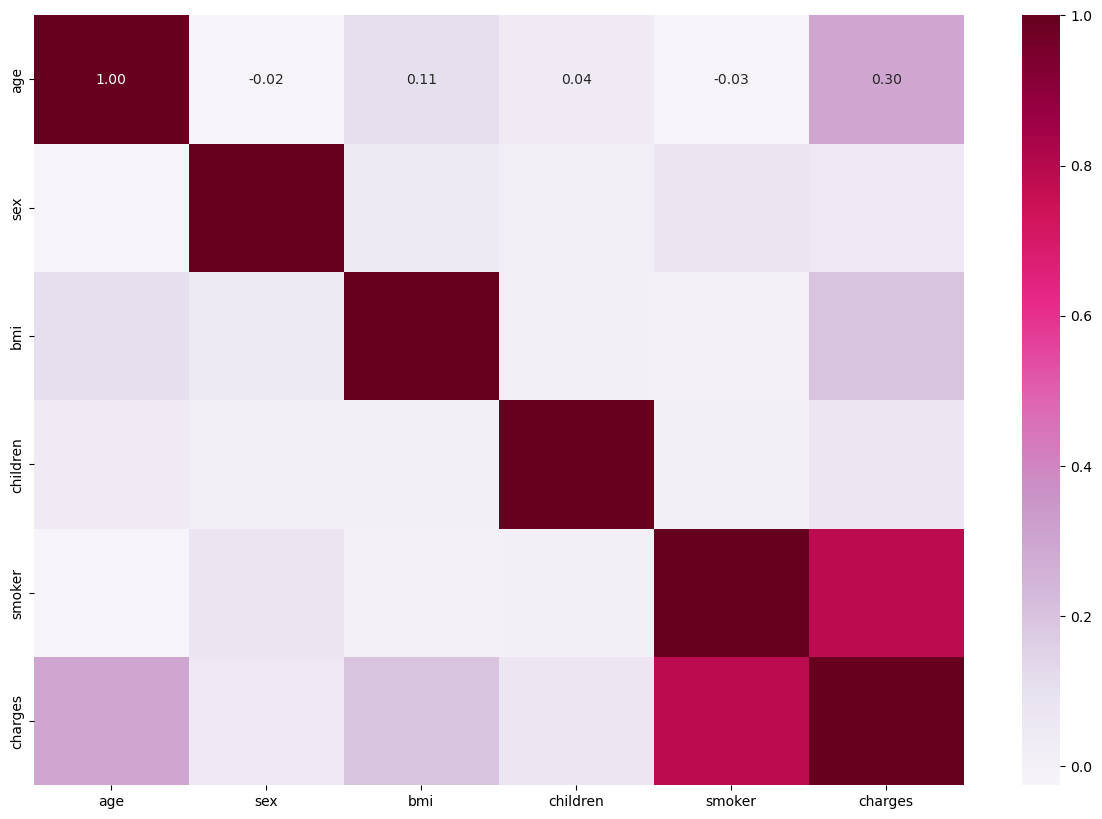

In [18]:
plt.subplots(1, 1, figsize=(15,10))
ax = sns.heatmap(df_new.corr(), annot=True, fmt=".2f", cmap='PuRd')

## 2.3 Feature Scaling

I wanted to look at feature scaling and how it works with linear regression. It allows the data to be more readible and makes it easier to work with. However, for ordinary least squares (OLS) regression, the scale of features does not matter. Yet, there are some other machine learning methods that I use later on within this project that utilize the scaled data.

### Min-Max Scaling

Min-max simply scales the data to be in the range [0,1]

#### Making new Dataset To Work With

Once again, I making a new copy of the original data set and converting the smoking habit categorical values into numerical ones.

In [19]:
df_medicaldata = df.copy()
df_medicaldata['smoker']=df_medicaldata['smoker'].replace({'yes': 1, 'no': 0})

In [20]:
# Setting features and creating a new data frame with just those values
features2 = ['age', 'bmi', 'children', 'smoker']
new_df = df_medicaldata[features2]

# Performing Min-Max Scaling
scaler = MinMaxScaler()
fitting = scaler.fit(new_df)

#Creating new Dataframe with scaled data
scaled_features = scaler.transform(new_df)
new_medicaldata_df  = pd.DataFrame(scaled_features, columns = features2)
df_medicaldata[features2] = new_medicaldata_df
df_medicaldata

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,1.0,southwest,16884.92400
1,0.000000,male,0.479150,0.2,0.0,southeast,1725.55230
2,0.217391,male,0.458434,0.6,0.0,southeast,4449.46200
3,0.326087,male,0.181464,0.0,0.0,northwest,21984.47061
4,0.304348,male,0.347592,0.0,0.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,0.0,northwest,10600.54830
1334,0.000000,female,0.429379,0.0,0.0,northeast,2205.98080
1335,0.000000,female,0.562012,0.0,0.0,southeast,1629.83350
1336,0.065217,female,0.264730,0.0,0.0,southwest,2007.94500


### Standard Scaler

Standard scaling scales the data to have mean 0 and standard deviation.

#### Making new Dataset to work with

Just like for min-max scaling, I made a new copy of the original data set and converting the smoking habit categorical values into numerical ones.

In [21]:
df_medicaldata2 = df.copy()
df_medicaldata2['smoker']=df_medicaldata2['smoker'].replace({'yes': 1, 'no': 0})

In [22]:
# Peforming Standard Scaling
news_df = df_medicaldata2[features2]
scaler = StandardScaler()
fitting2 = scaler.fit(news_df)

# Putting Scaled Values into a new dataframe
scaled_features2 = scaler.transform(news_df)
new_medicaldata_df2 = pd.DataFrame(scaled_features2, columns = features2)
df_medicaldata2[features2] = new_medicaldata_df2
df_medicaldata2

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,1.970587,southwest,16884.92400
1,-1.509965,male,0.509621,-0.078767,-0.507463,southeast,1725.55230
2,-0.797954,male,0.383307,1.580926,-0.507463,southeast,4449.46200
3,-0.441948,male,-1.305531,-0.908614,-0.507463,northwest,21984.47061
4,-0.513149,male,-0.292556,-0.908614,-0.507463,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,1.580926,-0.507463,northwest,10600.54830
1334,-1.509965,female,0.206139,-0.908614,-0.507463,northeast,2205.98080
1335,-1.509965,female,1.014878,-0.908614,-0.507463,southeast,1629.83350
1336,-1.296362,female,-0.797813,-0.908614,-0.507463,southwest,2007.94500


### Scaling with Linear Regression

Here I am using the scaled features to calculate the R^2 through Linear Regression to see how good of a model this is.

In [42]:
# Performing Linear Regression with Min-Max Scaling
lreg = LinearRegression()
x = df_medicaldata[features2]
y = df_medicaldata['charges']
print(lreg.fit(x,y))
print(lreg.score(x,y))

# Performing Linear Regression with Standard Scaling
lreg2 = LinearRegression()
x2 = df_medicaldata2[features2]
y2 = df_medicaldata2['charges']
print(lreg2.fit(x2,y2))
print(lreg2.score(x2,y2))

LinearRegression()
0.749694530346479
LinearRegression()
0.749694530346479


As you can see, feature scaling does not affect the linear regression because it just scales the data by a specific amount. It produces a similar score that we saw from earlier through multi-linear regrssion.

## 2.4 Ridge and Lasso Regression

Within this section I am using Ridge and Lasso Regression. These are two forms of regularization that discourages learning a more complex or flexible model. This prevents overfitting the data, so the analysis of the data won't be inaccurate. 

### Lasso Regression

In order to do the Lasso Regression, I will use an alpha level of 0.1. In addition, I will combine it with cross-validation, to estimate the performance of different models to choose the best one, and to estimates its prediction error on the new data. 

In [43]:
# I will be using the df_new dataset that I created earlier when I made the correlation matrix
featuresr = ['age', 'bmi', 'children', 'smoker']
target = ['charges']
Lasreg = Lasso(alpha = 0.1) 
kf = KFold(n_splits=5, shuffle=True, random_state=1)

scores2 = []

# Performing Cross-Validation
k = 1
for train_index, test_index in kf.split(df_new):

    X2_train, X2_test = df_new[featuresr].iloc[train_index], df_new[featuresr].iloc[test_index]
    y2_train, y2_test = df_new[target].iloc[train_index], df_new[target].iloc[test_index]

    # Performing Lasso Regression
    Lasreg.fit(X2_train, y2_train)

   
    y2_pred = Lasreg.predict(X2_test)

    score = r2_score(y2_test, y2_pred)
    scores2.append(score)

    k += 1

    
    print(f"Fold {k-1} R^2 score:", score)
    
# Printing average r^2 Score and average standard deviation of R^2
print("Average R^2 score:", np.mean(scores2))
print("Standard Deviation of R^2", np.std(scores2))

Fold 1 R^2 score: 0.761186850652237
Fold 2 R^2 score: 0.7140983166223692
Fold 3 R^2 score: 0.7391605810720623
Fold 4 R^2 score: 0.7545657719345518
Fold 5 R^2 score: 0.7646207525851663
Average R^2 score: 0.7467264545732772
Standard Deviation of R^2 0.01850730494031663


As shown the data has an average R^2 Score of 0.75, which signals that this is a strong combination of values when it comes to analyzing the data.

### Ridge Regression

As I do Ridge Regression, I will also be looking at the intercept and slope/coefficients of the regression, as well as it's coefficients. In addition, I will be utilizing an alpha value of 0.1 for the Ridge Regression.

In [44]:
# Setting the X and Y Values
XR = df_new[features]
yr = df_new[target]

# Splitting the Data
XR_train, XR_test, YR_train, YR_test = train_test_split(XR, yr, test_size=0.25, random_state=0)

# Fitting the model
ridgereg = Ridge(alpha=0.01)
ridgereg.fit(XR_train , YR_train)

# Printing the y-intercept and coefficients of the fitted Ridge Regression Model
print(f'Y-Intercept: {ridgereg.intercept_}')
print(f'Coefficients: {ridgereg.coef_[0]}')

# Calculating the Ridge Score indiciating the proportion of variance that can be explained by the model
ridgereg.score(XR_test, YR_test)

Y-Intercept: [-11564.48470539]
Coefficients: [  251.75851294   314.08630133   438.85903117 23623.9650244 ]


0.7952353564956216

From the score that we received from the Ridge Regression we can tell that the acurracy of the model is good and strong, since it is close to one as it is around 0.80.

Even though the two regularization methods seem similar, they hold some differences. The difference between lasso and ridge is that lasso tends to produce sparse solutions as it encourages the coefficients to be exactly 0, or close to 0. This can be useful because it aids in selecting a subset of the features. In addition, ridge regression has a closed-form solution, while Lasso does not. 

## Little Data Refresh for the next 2 sections

In [45]:
# Create a new dataframe by copying the original data frame
df_new2 = df.copy()

# Replacing sex and smoking habits with numerical values
df_new2['sex'] = df_new2['sex'].replace({'male': 1, 'female': 0})
df_new2['smoker']=df_new2['smoker'].replace({'yes': 1, 'no': 0})

# Setting the features and labels
features5 = ['age', 'bmi']
label = 'smoker'
df_new2.dropna(subset=features + [label], inplace=True)

# scale the features using similar code from earlier
scaler = StandardScaler()
df_new2[features5] = scaler.fit_transform(df_new2[features5])

X4 = df_new2[features5]
y4 = df_new2[label]

## 2.5 Logisitic Regression

### Multiclass Classification

Multiclass Classification assignes entities with two or more classes. Each entity is assigned to one class without any overlap. By combining it with logistic regression, it converts the loss function to the cross-entropy loss function and predict probability distribution to a multinomial probability distribution. 

Training accuracy: 0.798
Test accuracy: 0.788


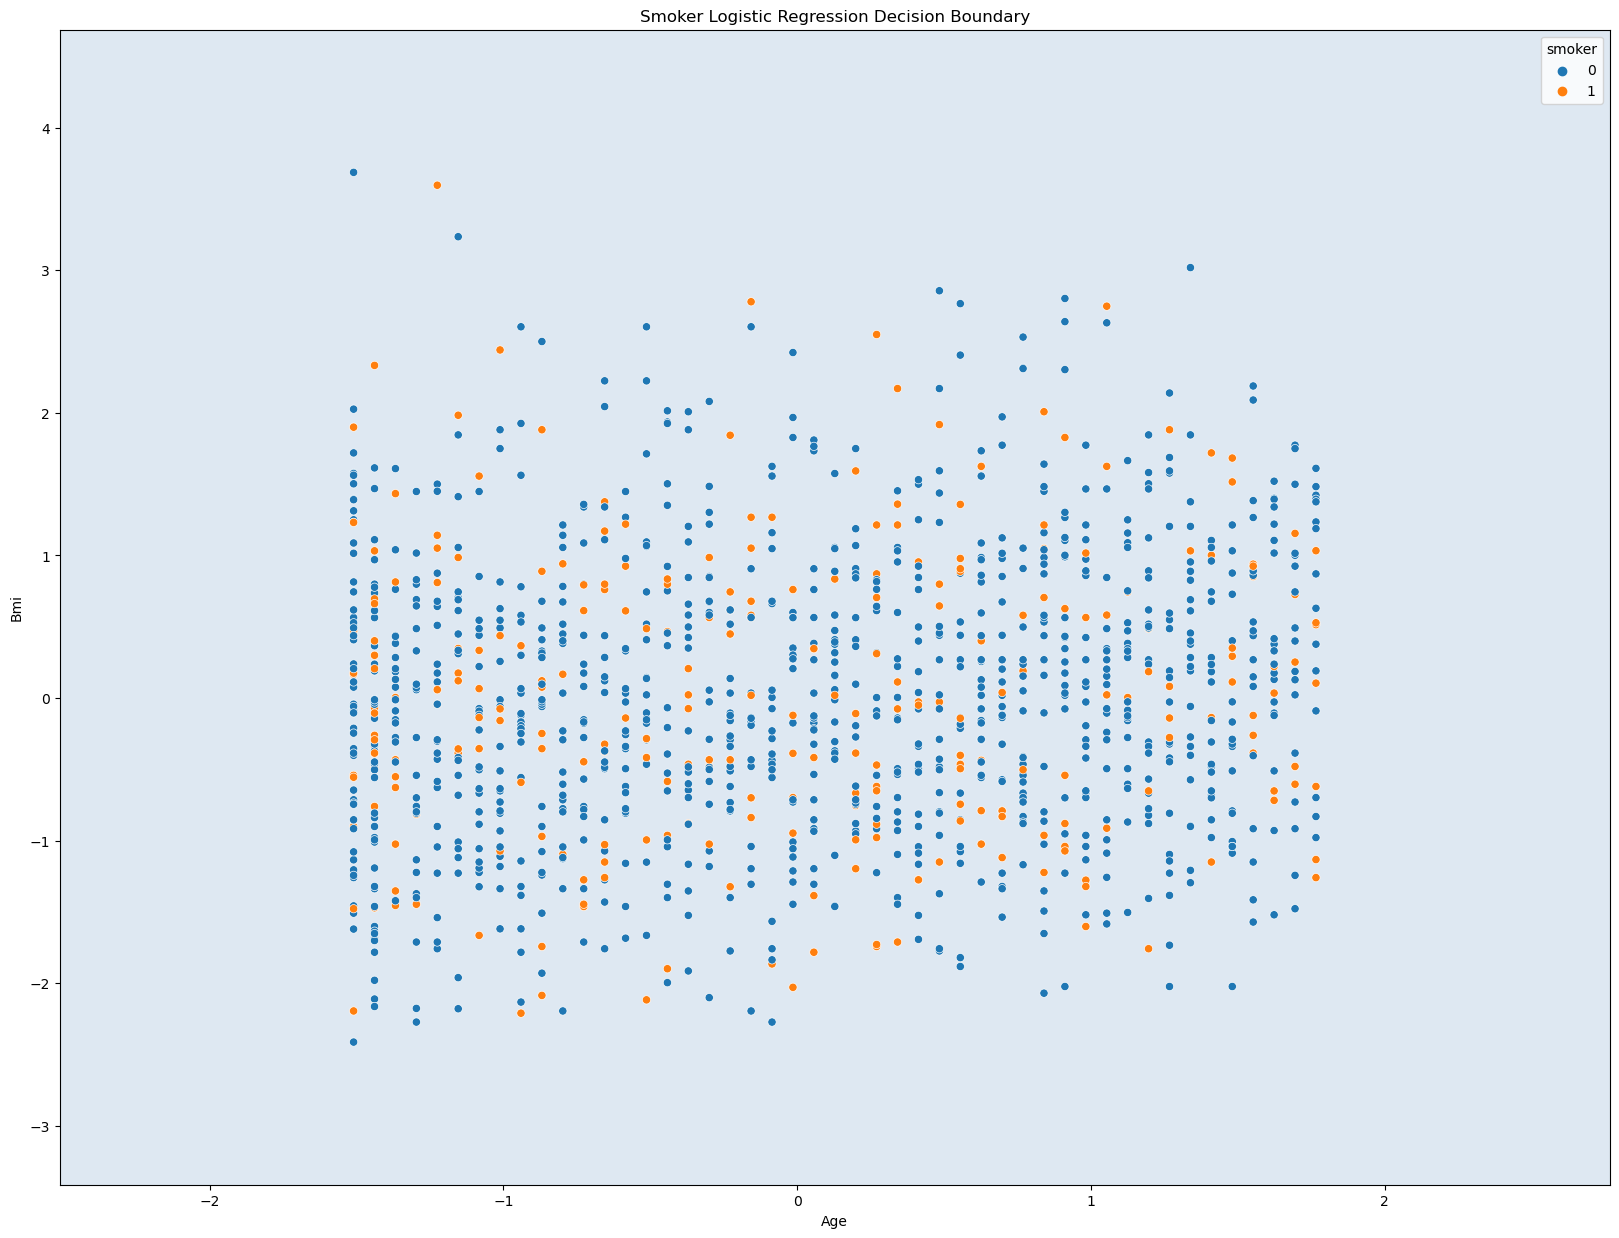

In [46]:
# Splitting the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=0)

#(1) Performing Logistic Regression
clf = LogisticRegression(penalty=None)
clf.fit(X4_train, y4_train)

#(2) Report the accuracy of the model
score_train = clf.score(X4_train, y4_train)
score_test = clf.score(X4_test, y4_test)
print(f"Training accuracy: {score_train:.3f}")
print(f"Test accuracy: {score_test:.3f}")

#(3) Visualize the decision boundary
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(clf, X4, grid_resolution = 200, response_method = 'predict', cmap= 'BuPu', alpha = 0.5, ax=ax)
sns.scatterplot(data = df_new2, x = X4[features5[0]], y = X4[features5[1]], hue = "smoker")

# Titles and Labels
ax.set_title('Smoker Logistic Regression Decision Boundary')
ax.set_xlabel('Age')
ax.set_ylabel('Bmi')

# Show Plot
plt.show() 

This graph does not seem that useful as there is no clear boundary lines or distinctions. This is probably do to the data used. Age, Bmi, and Smoking habits does not seem like the best choices to graph with. However, the acurracy values are quite useful. They are close 0.80, which is relatively high accuracy. Even though the graph may seem confusing and not helpful, the three variables have a great strong connection when prediciting an accurate value for the medical insurance charges.

## 2.6 kNN Classifier

To start with kNN classifier, I want to find the optimal value of k, that is going to work well with my data

In [47]:
# USING THE DF_NEW2 DATASET BECAUSE IT HAS THE FEATURES NUMERICAL INSTEAD OF CATEGORICAL MINUS THE REGION COLUMN
# FIND THE BEST VALUE OF 'k' TO WORK WITH

k = range(1,10)

kf = KFold(n_splits = 5, shuffle=True, random_state=0)

average_accuracies = []
for _ in k:
    scores = []
    
    for train_index, test_index in kf.split(df):
        
        # Splitting the Data
        X_train, X_test = df_new2[features5].iloc[train_index], df_new2[features5].iloc[test_index]
        y_train, y_test = df_new2[label].iloc[train_index], df_new2[label].iloc[test_index]
        
        # Performing kNN Classifier
        kNN = KNeighborsClassifier(n_neighbors=_)
        
        kNN.fit(X_train, y_train)

    
        y_pred = kNN.predict(X_test)
    
         # Calculating Score
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
    
    # Calculating accuracies
    average_accuracy = np.mean(scores)
    average_accuracies.append(average_accuracy)

# determining best k-value with the best accuracy
best_k = k[np.argmax(average_accuracies)]
best_accuracy = max(average_accuracies)

print(f"The best k is {best_k} with an average accuracy of {best_accuracy:.4f}")

The best k is 8 with an average accuracy of 0.7877


Utilizing the optimal k value we found and redoing the K-Nearest Neighbors Classifcation again.

The accuracy of the model is: 0.80


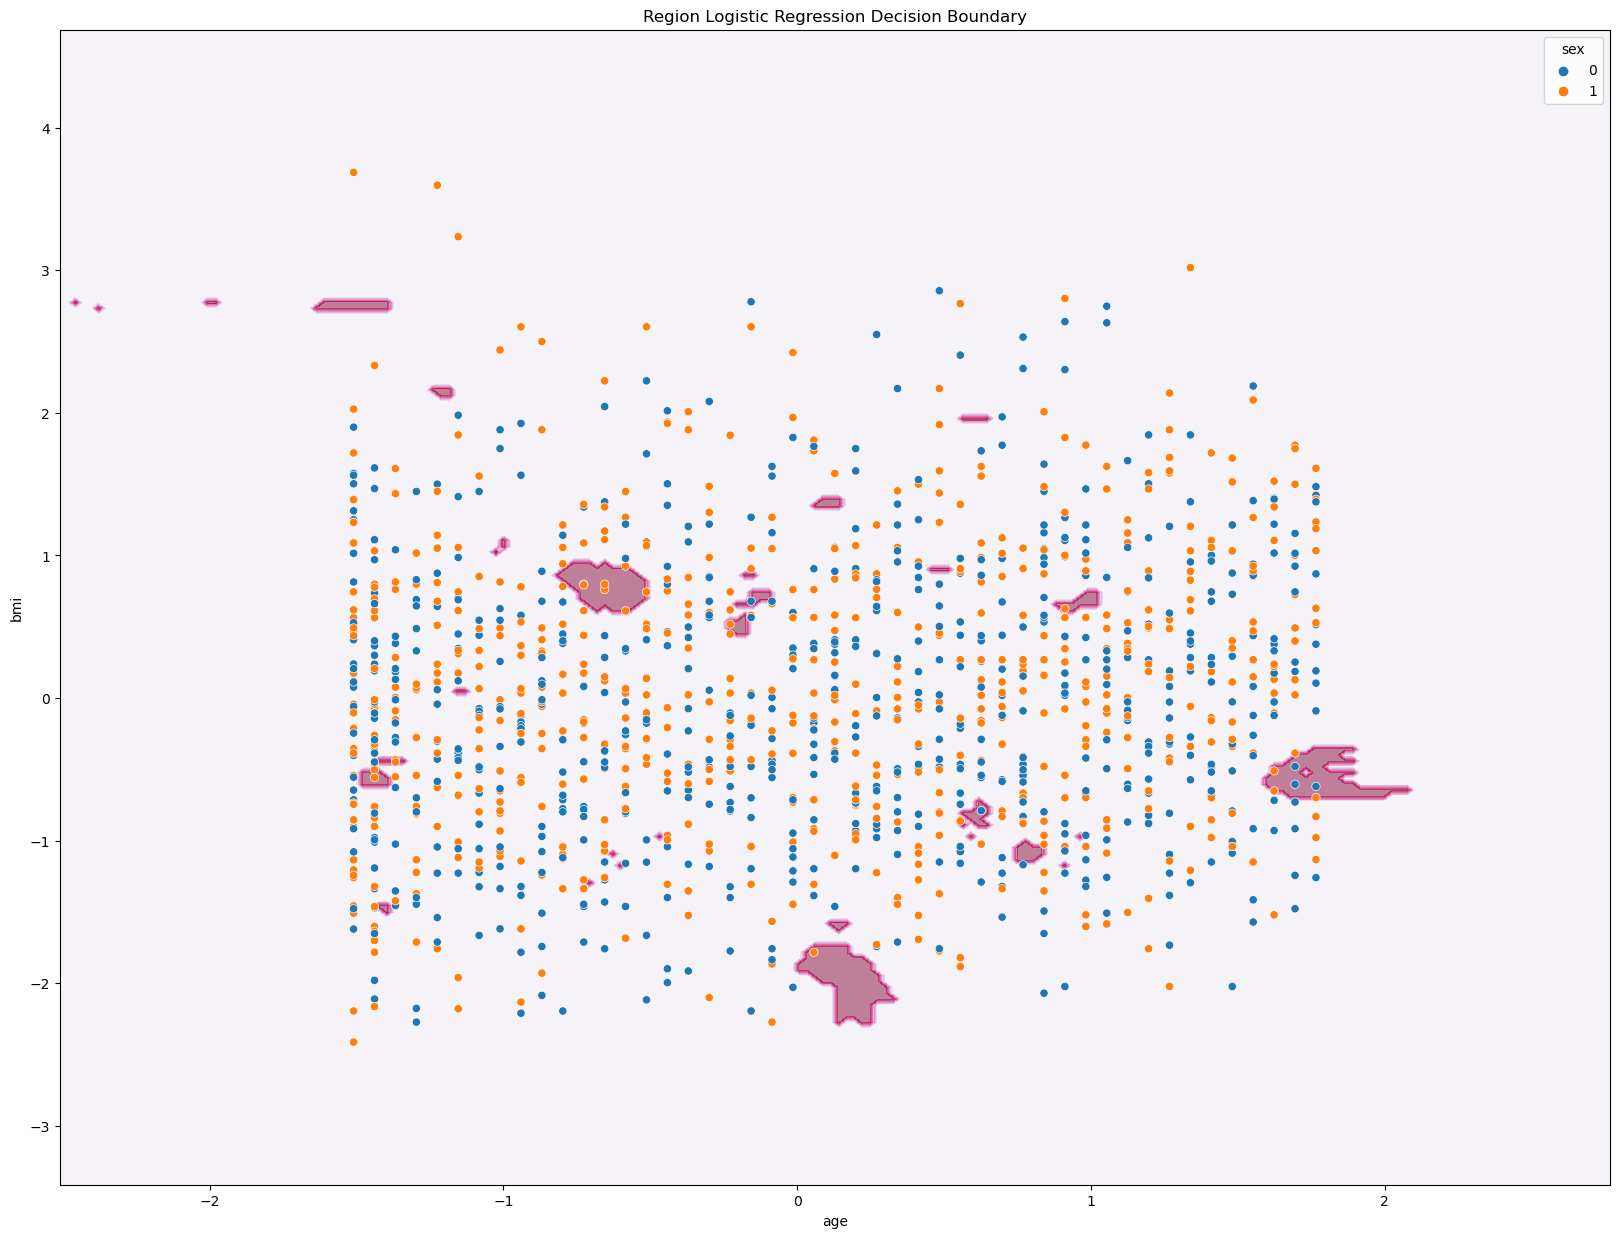

In [48]:
k = 9

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X4,y4)

#(2)
y_pred3 = knn.predict(X4)
accuracy = accuracy_score(y4, y_pred3)

print(f"The accuracy of the model is: {accuracy:.2f}")

#(3)
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(knn, X4, grid_resolution = 200, response_method = 'predict', cmap= 'PuRd', alpha = 0.5, ax=ax)
sns.scatterplot(data = df_new2, x = X4[features5[0]], y = X4[features5[1]], hue = "sex")

ax.set_title('Region Logistic Regression Decision Boundary')
ax.set_xlabel('age')
ax.set_ylabel('bmi')

plt.show()

Just like the Multiclass Classification for Logistic Regression, the graph for the kNN Classifier does not seem as useful to us in easily identifying patterns within the data. However, we get that same accuracy score of 0.80, which like I said earlier, is a relatively high value. Hence, the three variables age, bmi, and region have a strong correlation to the predicting medical charges. 

# Section 3: Testing/Playing around with Statsmodel

References: These were some references that I used to get a good sense of how statsmodel works. They helped me understand the coding and tables, and utilizing the package to do linear regression: 
https://www.youtube.com/watch?v=U7D1h5bbpcs, https://www.youtube.com/watch?v=XynxBvUGgFk, https://www.youtube.com/watch?v=_XAurJJQ7jw

Here I am taking my original dataset and analyzing it using statsmodel. I am going to look at the different indepdent variables within the dataset and see how it affects the dependent variable, medical charges. Along with this, I will be checking some assumptions about the dataset that we might initially have regarding the data, as well. 

## Fresh Dataset 

I am just recopying the original dataset and swapping out all the string values of region into numerical values

In [49]:
df_stats = df.copy()
df_stats
df_stats['region'] = df_stats['region'].replace({'southwest': 1, 'southeast': 2, 'northeast': 3, 'northwest': 4})
df_stats['sex'] = df_stats['sex'].replace({'male': 1, 'female': 0})
df_stats['smoker']=df_stats['smoker'].replace({'yes': 1, 'no': 0})

In [50]:
# my code orginally wasn't working because I needed to convert the dtype of children from an object to an int64
df_stats['children'] = df_stats['children'].astype(int)

In [51]:
# Double checking that the dtype of children was changed
print(df_stats.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


Here I am using the statsmodel to apply an OLS regression to the data. I set my features/x-variables to be age, smoker, region, bmi, sex, and children. My y-varialbe is the medical insurance charges.

In [52]:
featuress = ['age','smoker','region','bmi','sex','children']
Xs = df_stats[featuress]
ys= df_stats['charges']
Xs = sm.add_constant(Xs)
model = sm.OLS(ys, Xs).fit()
model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.8
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:52:53   Log-Likelihood:                -13549.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.299e+04   1076.314    -12.067      0.0

## Checking Assumptions of Linear Relationships

These are a set of scatterplots that have all the independent variables(sex, age, children, bmi, smoker) on the x-axis and the dependent variable(charges) on the y-axis. 

I am able to use this data to cross reference with the chart above. For instance, if you look at the coefficent values(coef), The very large coefficents and very small coefficients correlates with a lack of linearity. However, we see that BMI and Age have more of a linear trend comapred to the the rest of the dependent variables. 

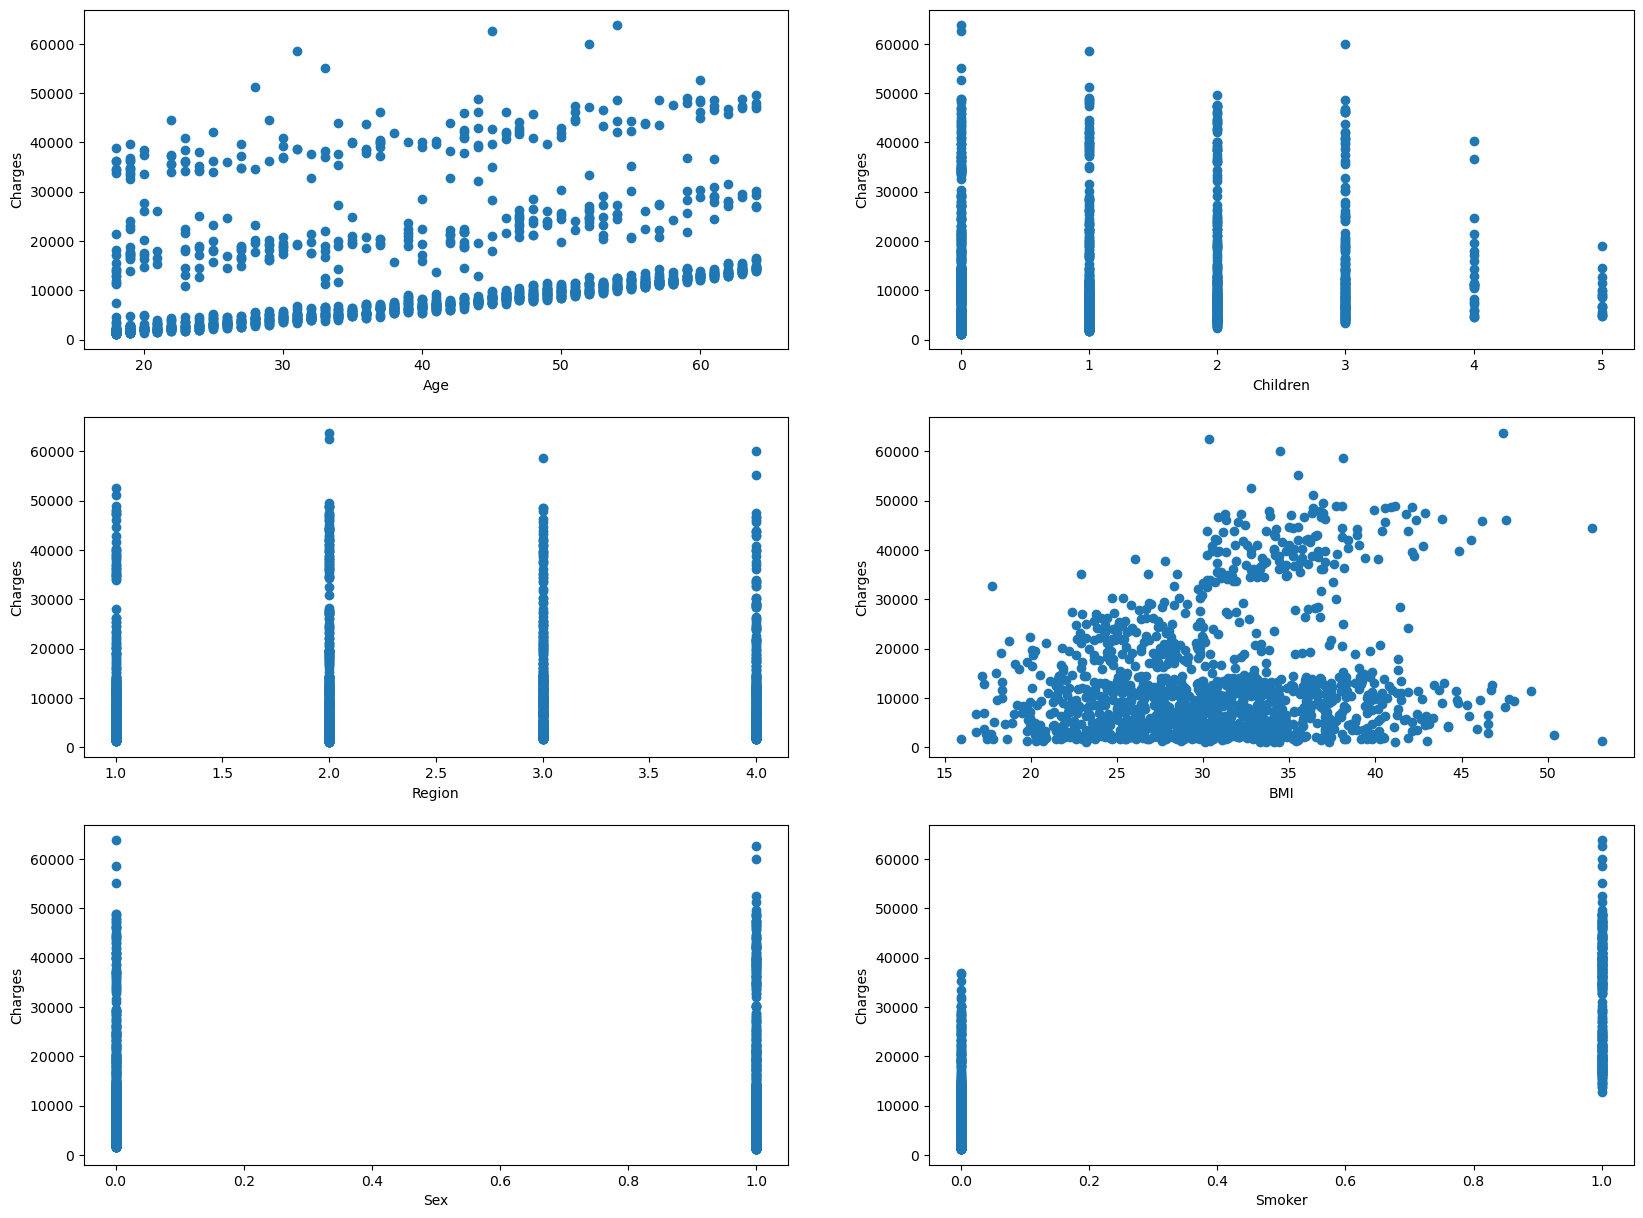

In [53]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

# Creating Scatter plot for Age and Residuals
ax1.scatter(Xs['age'], ys)
ax1.set_xlabel('Age')
ax1.set_ylabel('Charges')

# Creating Scatter plot for Children and Charges
ax2.scatter(Xs['children'], ys)
ax2.set_xlabel('Children')
ax2.set_ylabel('Charges')

# Creating Scatter plot for Region and Charges
ax3.scatter(Xs['region'], ys)
ax3.set_xlabel('Region')
ax3.set_ylabel('Charges')

# Creating Scatter plot for BMI and Charges
ax4.scatter(Xs['bmi'], ys)
ax4.set_xlabel('BMI')
ax4.set_ylabel('Charges')

# Creating Scatter plot for Sex and Charges
ax5.scatter(Xs['sex'], ys)
ax5.set_xlabel('Sex')
ax5.set_ylabel('Charges')

# Creating Scatter plot for Smoking Habits and Charges
ax6.scatter(Xs['smoker'], ys)
ax6.set_xlabel('Smoker')
ax6.set_ylabel('Charges')

plt.show()

## Checking Assumptions of Multicollinearity

In [54]:
{Xs.columns[i]: variance_inflation_factor(Xs.values, i) for i in range(1, Xs.shape[1])}

{'age': 1.0153181878142519,
 'smoker': 1.0066139993562166,
 'region': 1.025545147468304,
 'bmi': 1.0402422340134285,
 'sex': 1.008878673337003,
 'children': 1.002254148665187}

Here we are looking at the values of the variance inflation factor, which is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple indepdendent variables in a multi-linear regression model. 

None of the independent variables have a high VIF(variance inflation factor), so they are useful for the data. If one of the variables were to have a high VIF, then you would have to take them of the data analysis

## Checking Assumptions of Homoscedasticity 

Homoscedasticity is the measure of constant variance within the model. This takes the residuals within the model and uses the variance of those residuals to see if they are unequal over a range of measured values. In this case it is seeing if there is equal or similar variance in the independent variables(sex, age, bmi, gender, region, children). Most of the data should be near the vertical line at 0, which it is, however there is some data that is further away from this line scattered in smaller clusters.

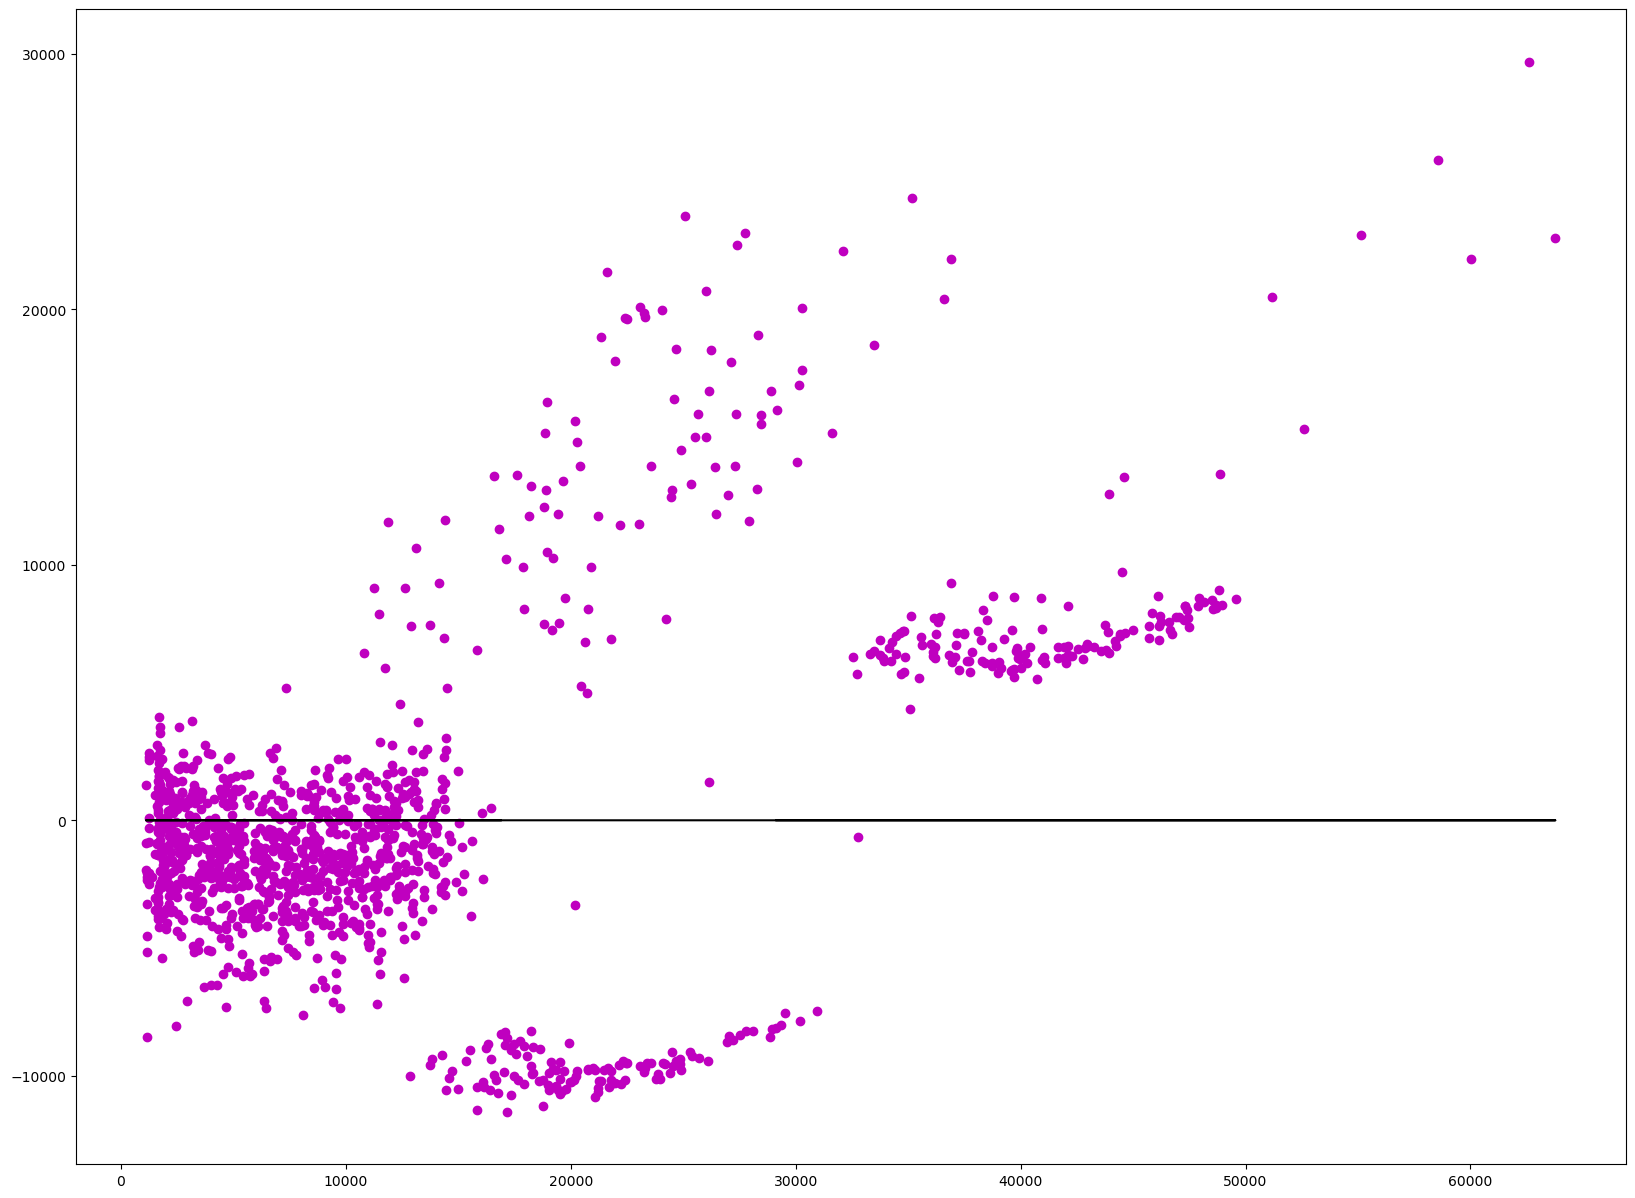

In [55]:
residuals = model.resid
plt.scatter(ys, residuals, color='m')
plt.plot(ys, [0]*len(ys), color='k')

## Checking Assumptions of Autocorrelation of Errors

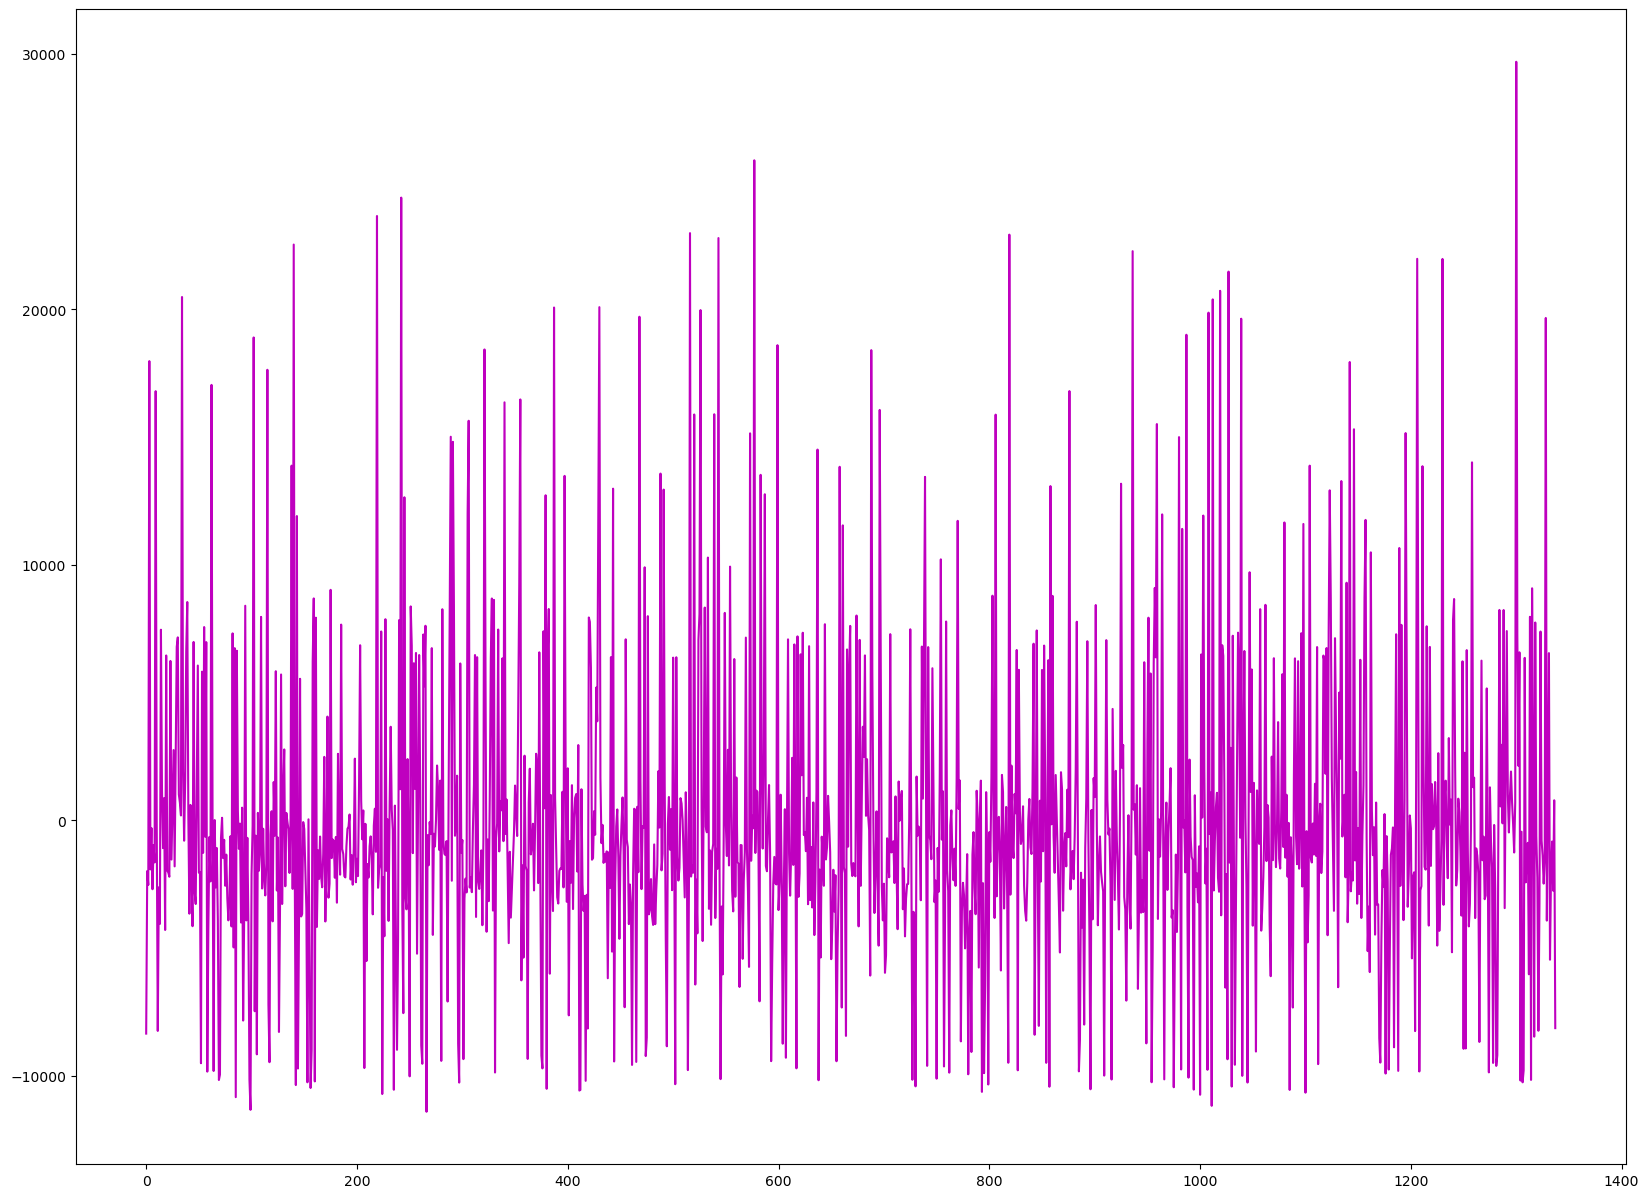

In [56]:
plt.plot(residuals.index, residuals, color='m')

This assumption is when you are not able to catch the error within the model. Above is an error chart, which relays this. If there is a pattern that is noticeable, then that means that there is an error that is correlated. And if that happens, you have to see what variables are causing this error and go back and change them to get rid of this autocorrelation, so, you can have more accurate variables that capture more patterns of the data.

There doesn't seem to be an apparent pattern within my data, so the variables are a good fit for the data analysis.

## Checking Assumptions of Residual Normality

Within the data, the residuals should be normal. This can be shown throw a QQPlot, which all the residuals should ideally be in a straight line. If there is more deviation then that means the residuals are not normally distributed.

Below, we can see that there is some disparity towards the very end of the line, once it hits the 1.5 theoretical quanties. Those data points must not have residuals that are normally distributed.

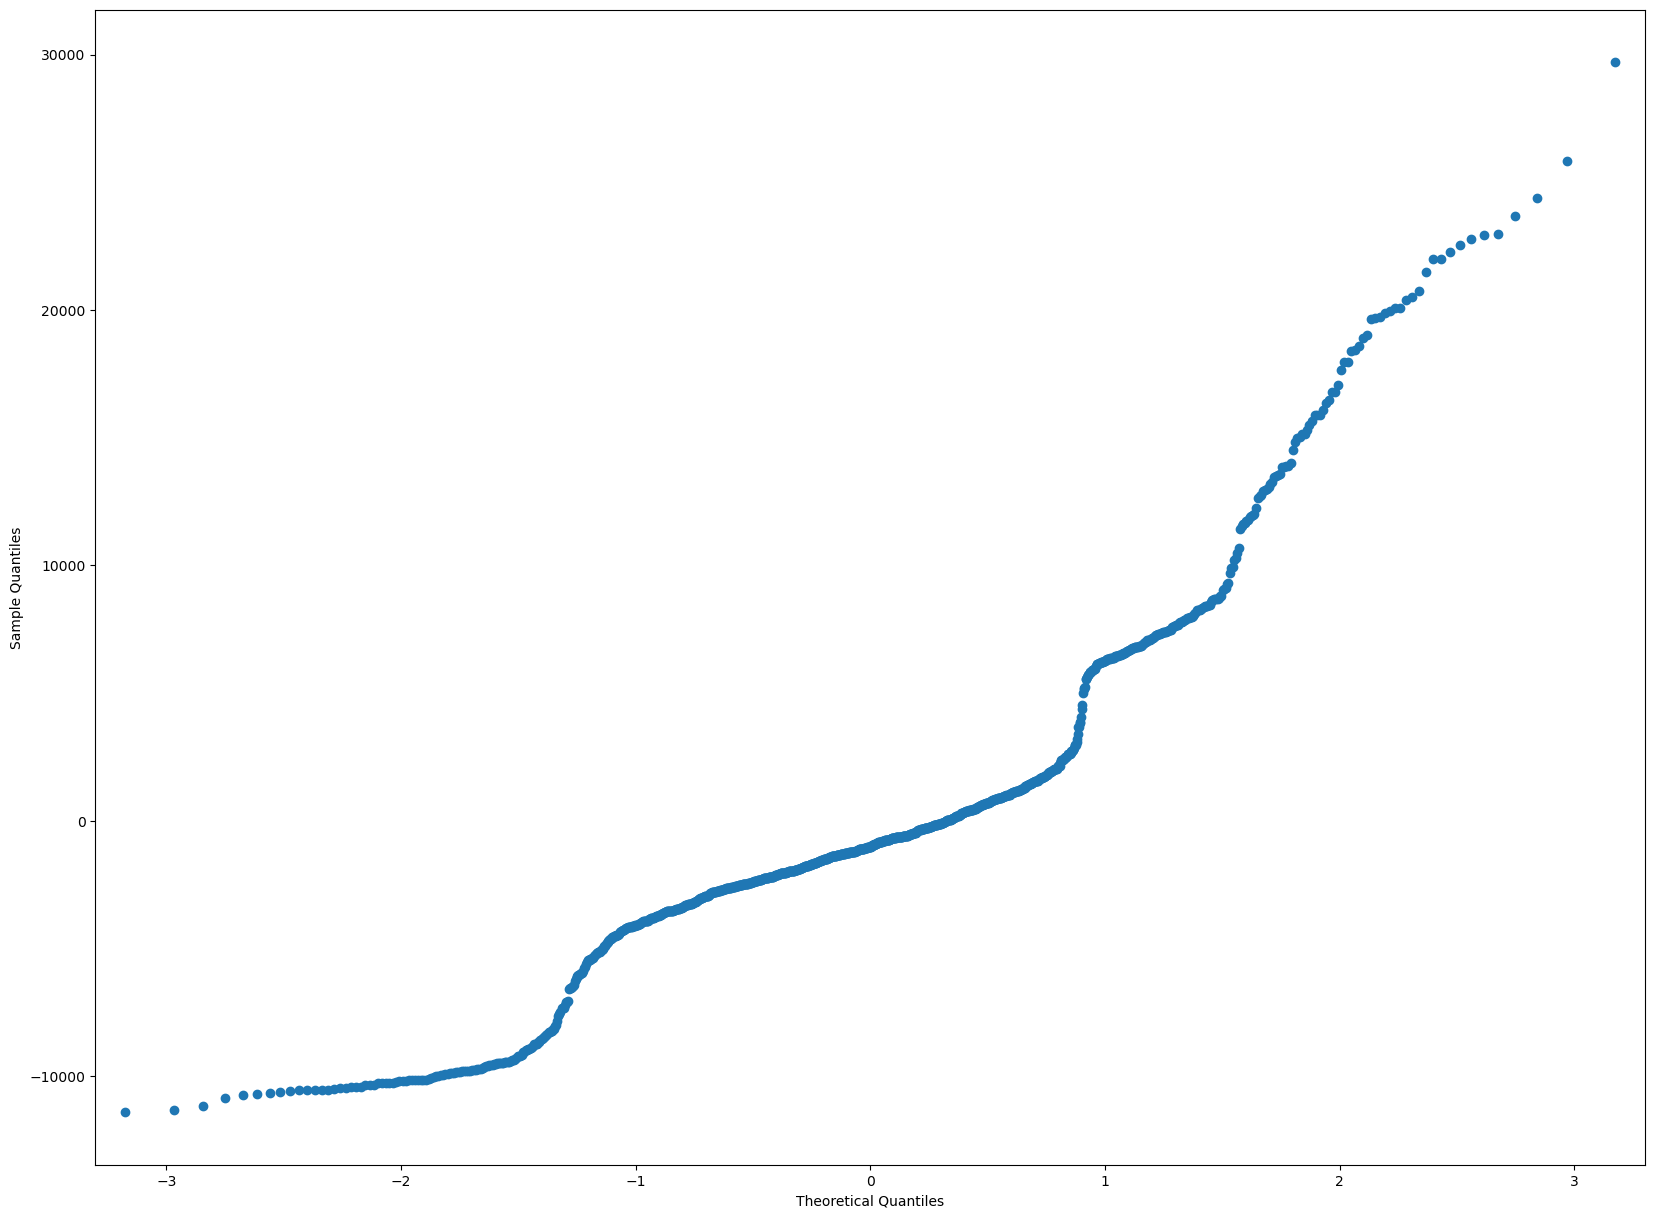

In [57]:
residuals = model.resid
sm.qqplot(residuals)
plt.show()

/Users/wiqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


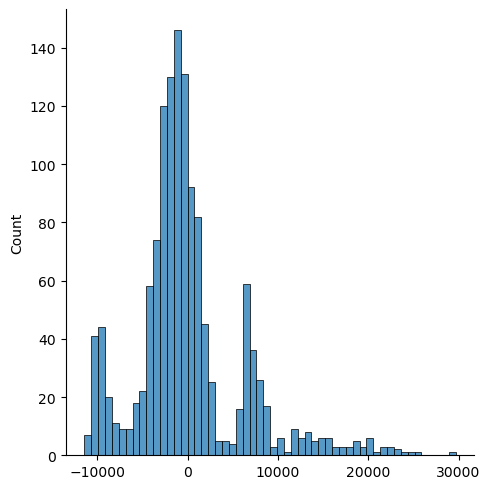

In [58]:
sns.displot(residuals)

Here is a chart which shows that the data does not seem as normally distributed as I initially perceived it in the first chart. There are two extra peaks that seem to offset the data. Hence, that means there is some variables within my data that are not suitable for the analysis. 

In [59]:
# ANOTHER WAY OF TELLING THAT THE RESIDUALS ARE NORMALLY DISTRIBUTED IS IF THE MEAN IS CLOSE TO 0
np.mean(residuals)

-4.2959689949214545e-12

## Checking Assumptions of Residual Relation with Independent Variables

Within this assumption, the residuals should not give any relation with the indepdent variables.

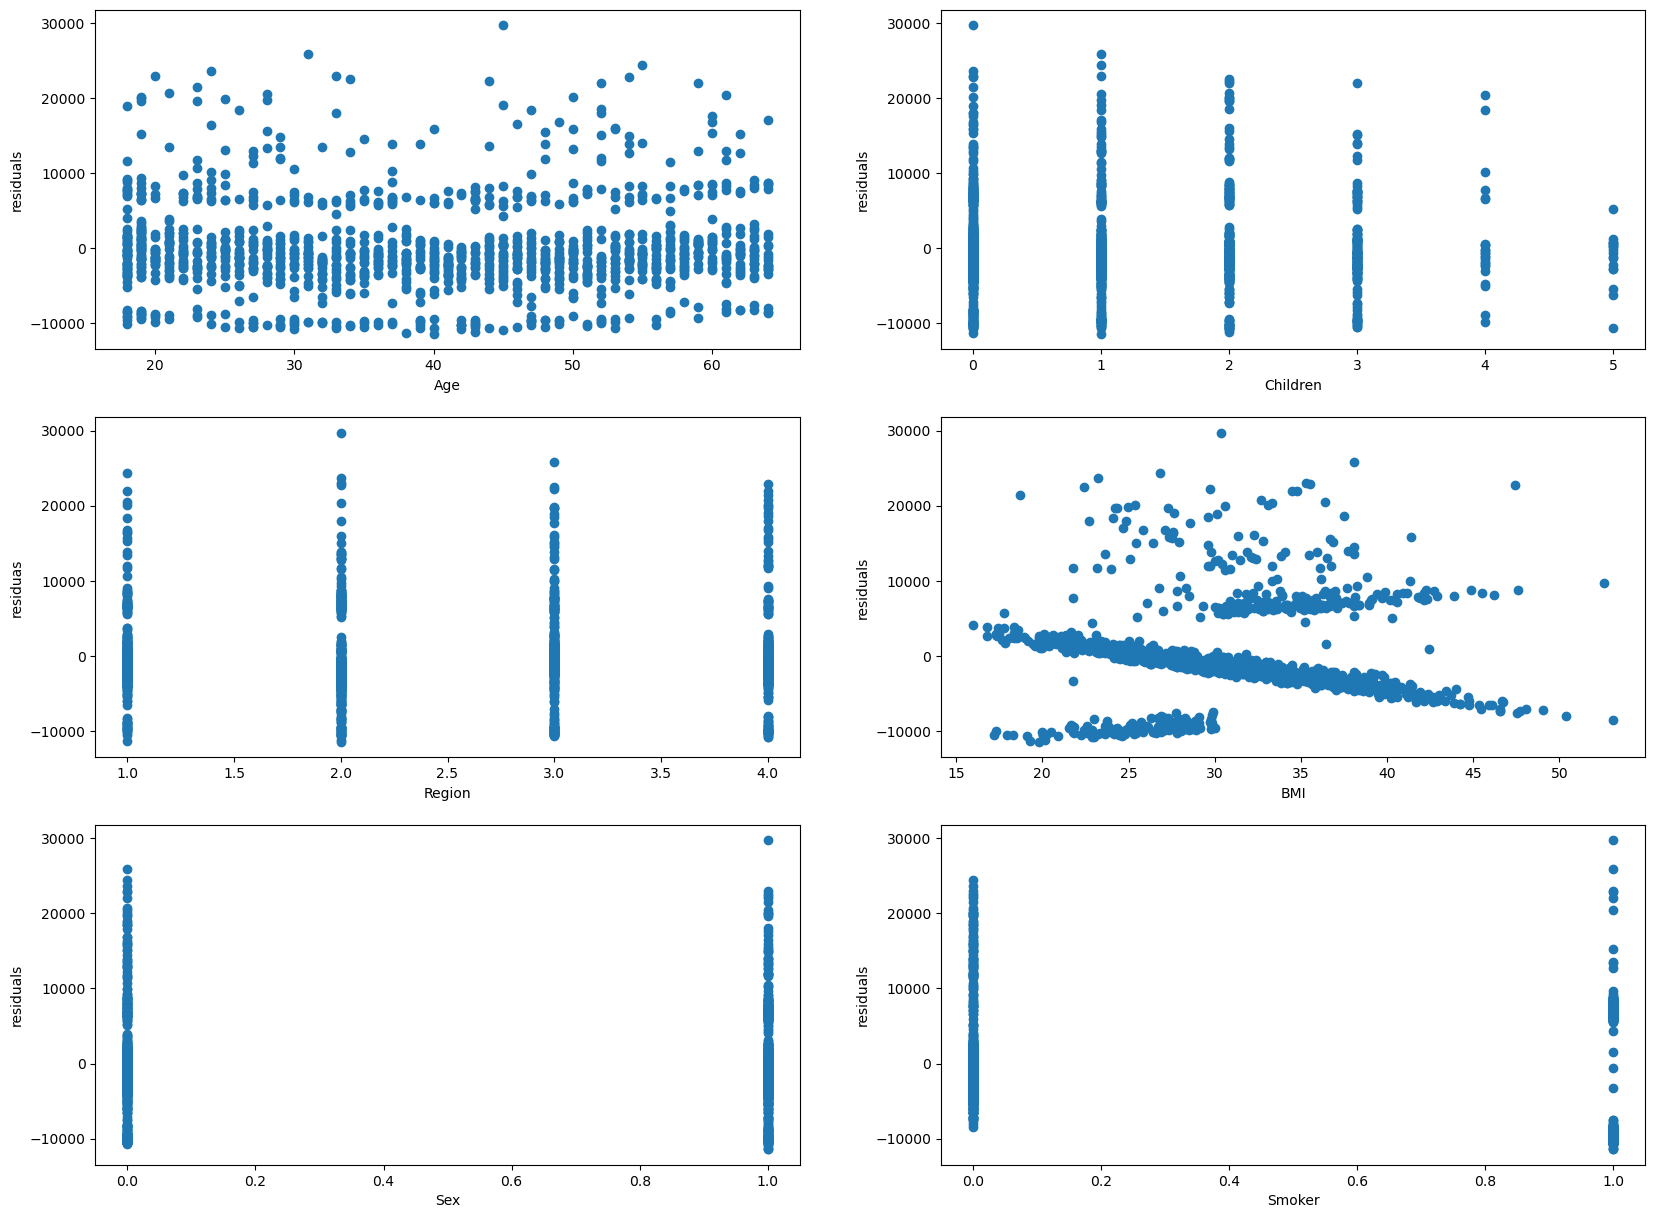

In [60]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

# Creating Scatter plot for Age and Residuals
ax1.scatter(Xs['age'], residuals)
ax1.set_xlabel('Age')
ax1.set_ylabel('residuals')

# Creating Scatter plot for Children and Residuals
ax2.scatter(Xs['children'], residuals)
ax2.set_xlabel('Children')
ax2.set_ylabel('residuals')

# Creating Scatter plot for Region and Residuals
ax3.scatter(Xs['region'], residuals)
ax3.set_xlabel('Region')
ax3.set_ylabel('residuas')

# Creating Scatter plot for BMI and Residuals
ax4.scatter(Xs['bmi'], residuals)
ax4.set_xlabel('BMI')
ax4.set_ylabel('residuals')

# Creating Scatter plot for Sex and Residuals
ax5.scatter(Xs['sex'], residuals)
ax5.set_xlabel('Sex')
ax5.set_ylabel('residuals')

# Creating Scatter plot for Smoking Habits and Residuals
ax6.scatter(Xs['smoker'], residuals)
ax6.set_xlabel('Smoker')
ax6.set_ylabel('residuals')

# Show Plot
plt.show()

The residuals does not seem to be showing a residual pattern. So, the residuals show no relation with the indepdent variables.

# Conclusion/Summary

In this work, we looked at different personal attributes/variables and whether/how they are related to medical insurance costs. We did an overview/basic analysis of the data, use multiple staistical/machine linear models such as regressions and classifications to investigate the relationship between the independent variables of personal attributes and the dependent variables of medical charges. Then, I utilized a new package, statsmodel, to do an OLS Regression of the data to notice any patterns within the data, and look over assumptions that we may have about the Linear Regression of the model. Overall, smoking habits seems to be the best telling variable regarding medical insurance charges. The other variables play an important role with medical charges, but they don't make as great of an impact as smoking does.